<a href="https://colab.research.google.com/github/RAFS20/Data-Science/blob/main/Trump_vs_Harris_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disclaimer**:

This code is a simulation tool based on simplified assumptions and recent polling margins. The generated results represent probabilistic estimates only and are subject to the inherent variability of polling data and the margin of error set in the simulation. It does not constitute a definitive prediction nor does it guarantee real-world outcomes.

Please note that the model does not account for factors such as unexpected shifts in voter behavior, unforeseen campaign events, or last-minute changes in public opinion. Additionally, input data may vary depending on the source and timing of data collection. Therefore, results should be interpreted as probability estimates rather than final forecasts.

---

**License**:

This code is licensed under the GNU General Public License (GPL). You are free to use, modify, and distribute this code under the terms of the GPL. Please refer to the [GNU General Public License](https://www.gnu.org/licenses/gpl-3.0.en.html) for more details.

Exercise

Ricardo Alonzo Fernández Salguero

Simulated Victory Probabilities
  Candidate  Probability (%)
0     Trump            68.57
1    Harris            31.43
2       Tie             0.00


<ipython-input-9-e4d7ad3d04ab>:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




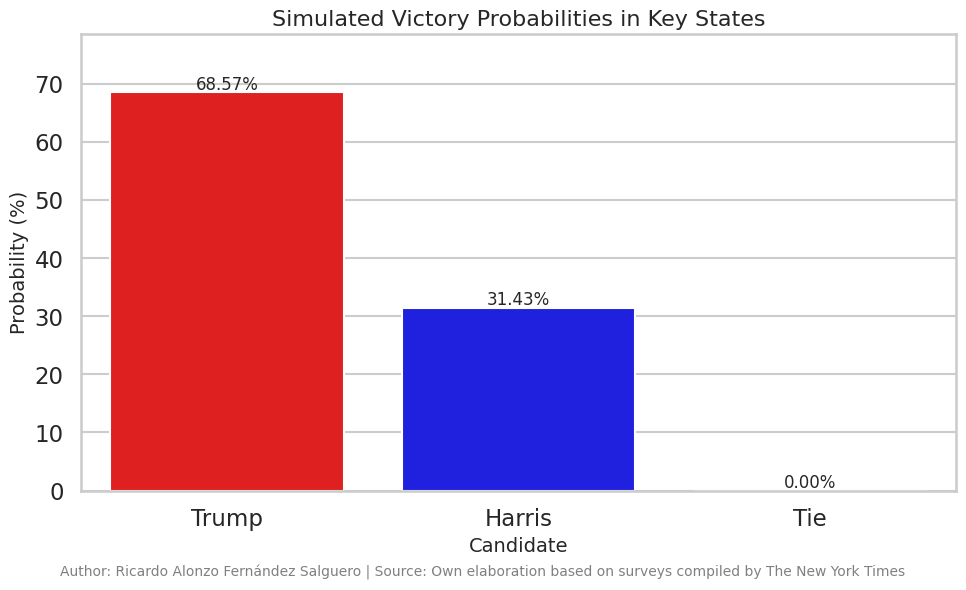

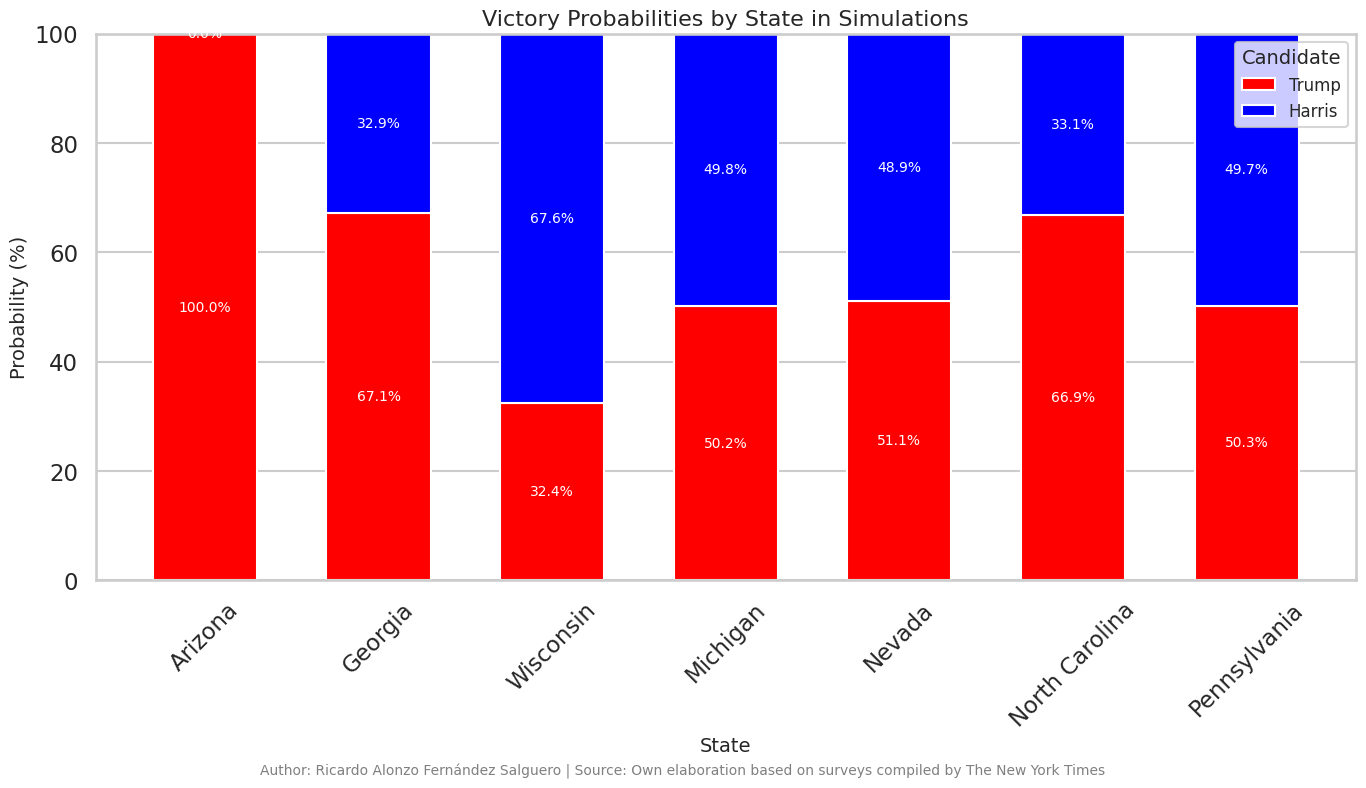

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-9-e4d7ad3d04ab>:153: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



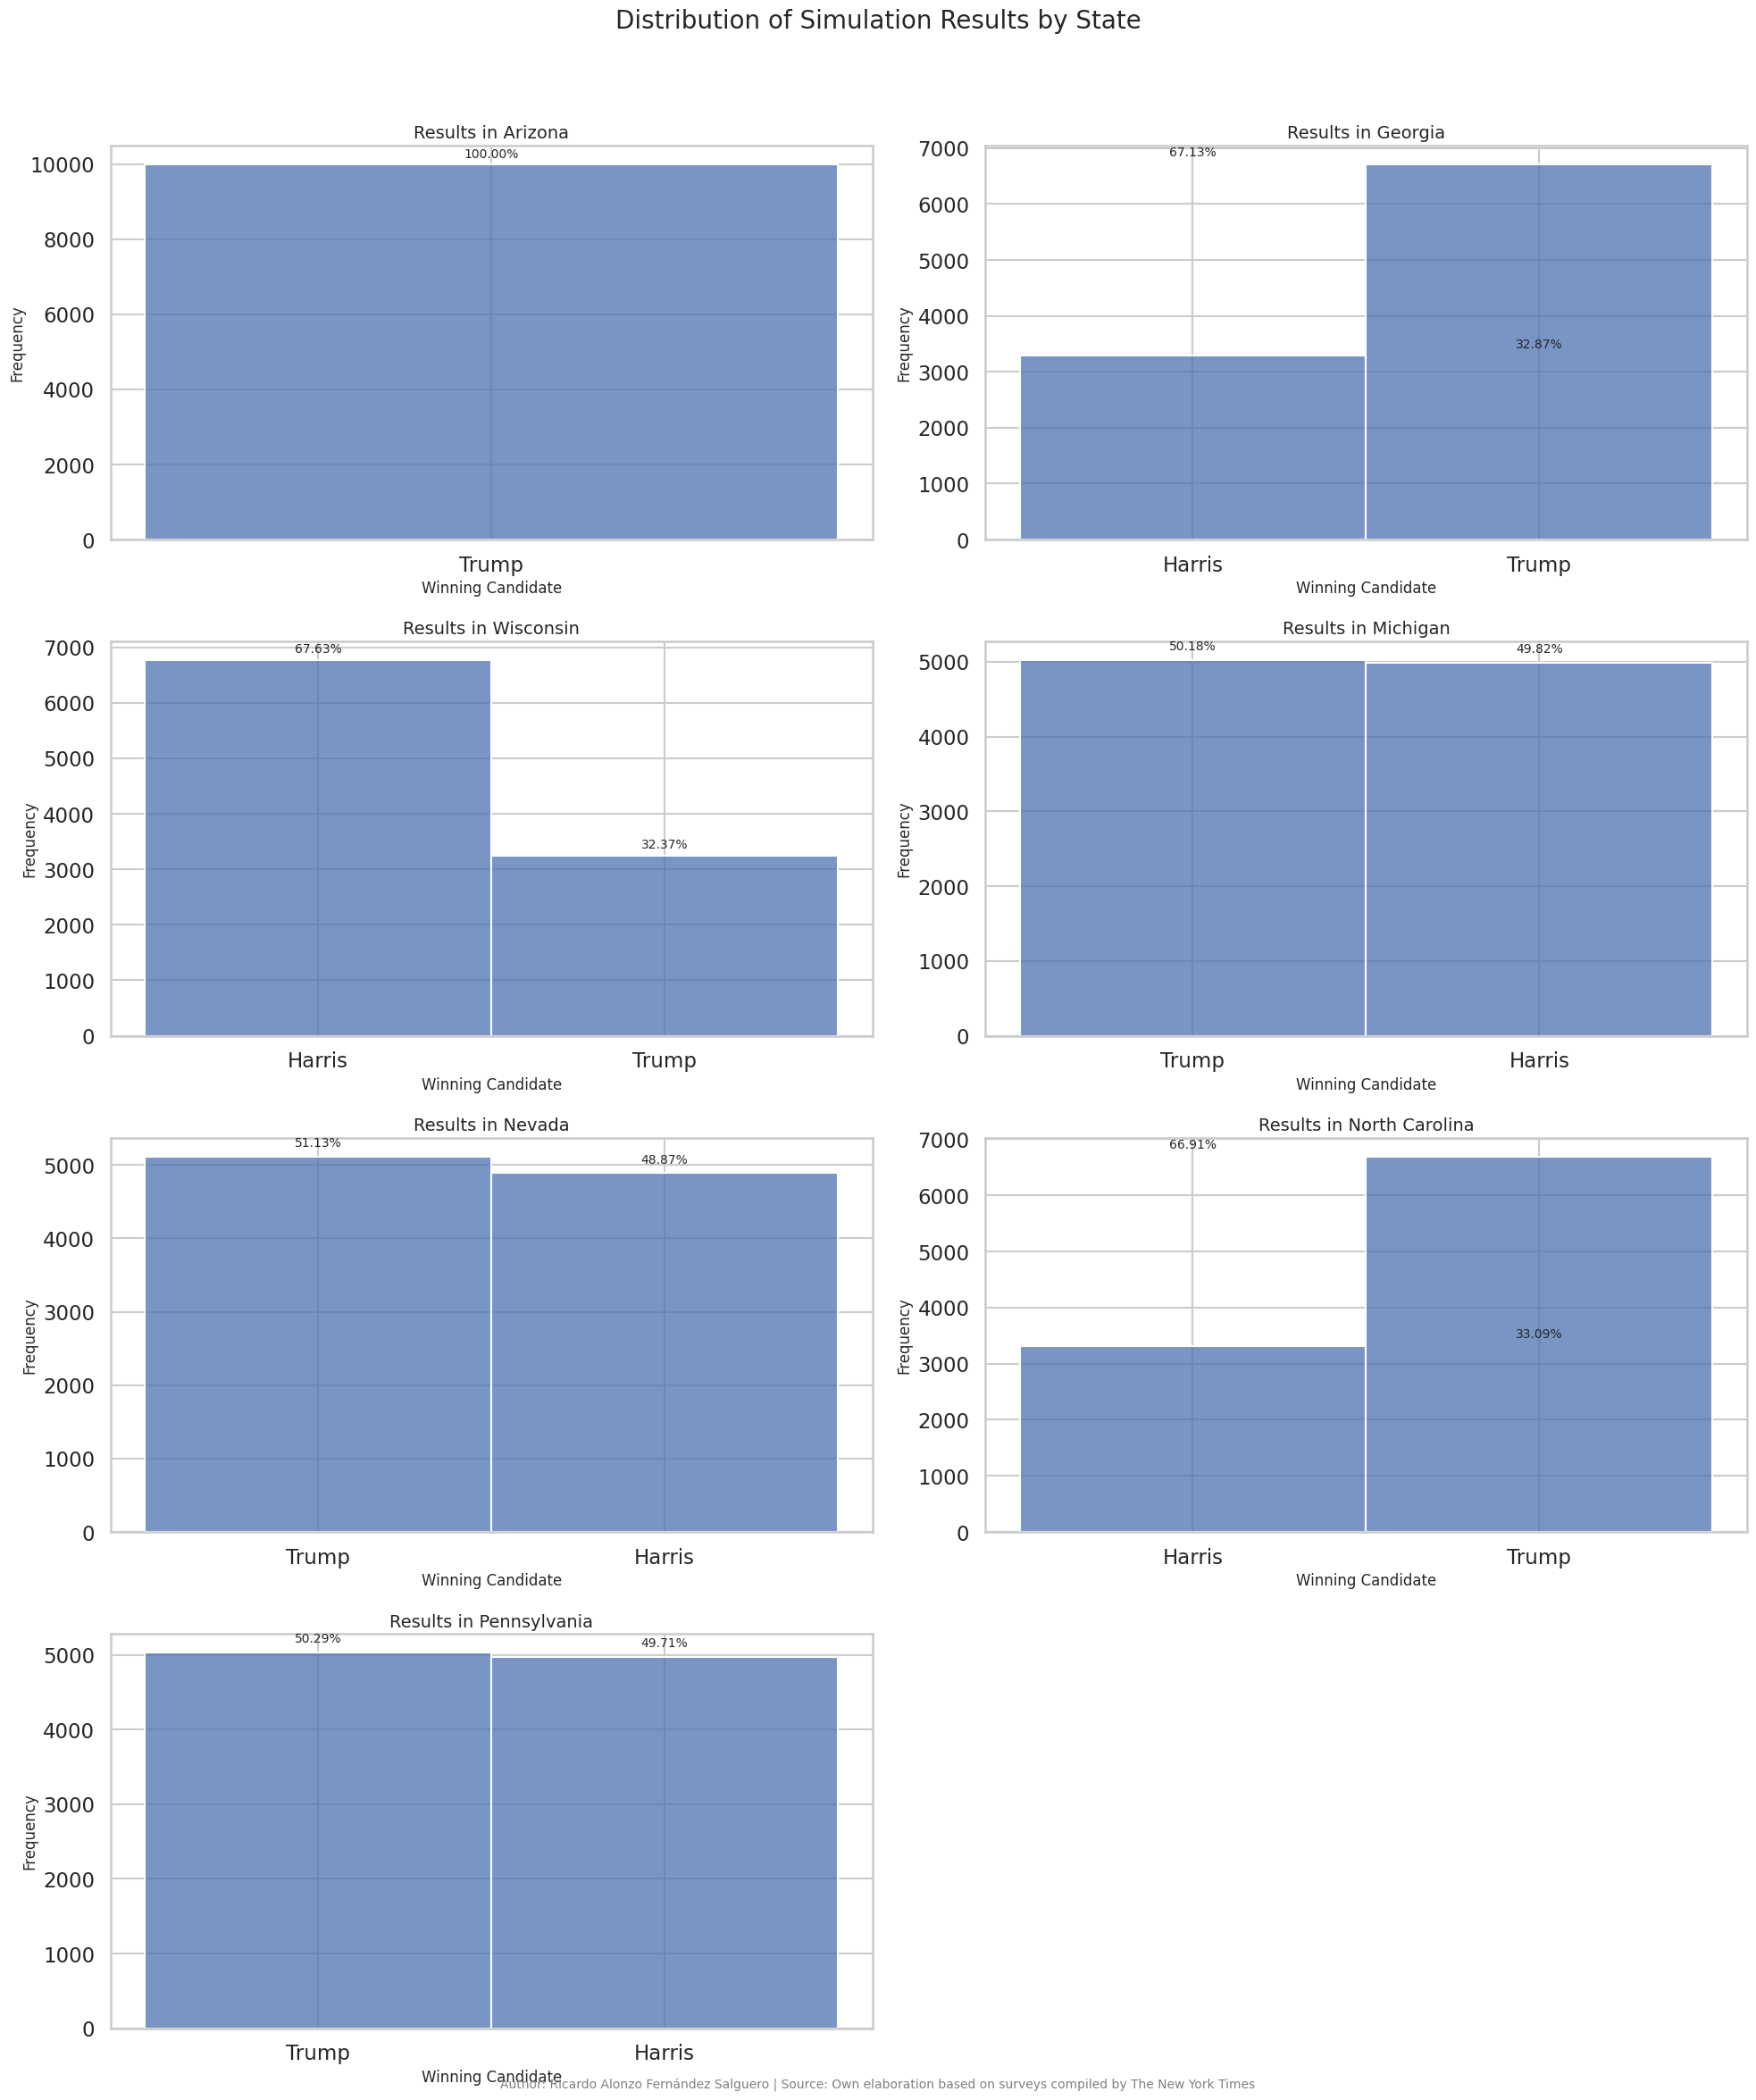

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Define key swing states and their recent polling margins
# Positive margin favors Trump, negative margin favors Harris
swing_states = {
    "Arizona": 3,        # Trump +3
    "Georgia": 1,        # Trump +1
    "Wisconsin": -1,     # Harris +1
    "Michigan": 0,       # Tie
    "Nevada": 0,         # Tie
    "North Carolina": 1, # Trump +1
    "Pennsylvania": 0    # Tie
}

# Total electoral votes in these key states
electoral_votes = {
    "Arizona": 11,
    "Georgia": 16,
    "Wisconsin": 10,
    "Michigan": 15,
    "Nevada": 6,
    "North Carolina": 16,
    "Pennsylvania": 19
}

# Simulation settings
num_simulations = 10000
error_margin = 3

def prepare_data(swing_states, electoral_votes):
    """Converts the dictionaries of states and electoral votes into a DataFrame."""
    df = pd.DataFrame({
        'State': list(swing_states.keys()),
        'Margin': list(swing_states.values()),
        'ElectoralVotes': list(electoral_votes.values())
    })
    return df

def simulate_election_vectorized(df, num_simulations, error_margin):
    """Performs election simulation in a vectorized manner."""
    # Generate random errors
    random_errors = np.random.uniform(-error_margin, error_margin, size=(num_simulations, len(df)))
    # Calculate margins with error
    margins = df['Margin'].values + random_errors
    # Determine winners per simulation
    winners = margins > 0  # True for Trump, False for Harris
    # Calculate electoral votes
    electoral_votes_array = df['ElectoralVotes'].values
    trump_votes = winners @ electoral_votes_array
    harris_votes = (~winners) @ electoral_votes_array
    return trump_votes, harris_votes, winners

def calculate_probabilities(trump_votes, harris_votes):
    """Calculates the probabilities of victory for each candidate."""
    trump_prob = np.mean(trump_votes > harris_votes) * 100
    harris_prob = np.mean(harris_votes > trump_votes) * 100
    tie_prob = np.mean(trump_votes == harris_votes) * 100
    return trump_prob, harris_prob, tie_prob

def create_results_df(trump_prob, harris_prob, tie_prob):
    """Creates a DataFrame with the probabilities of victory."""
    results_df = pd.DataFrame({
        "Candidate": ["Trump", "Harris", "Tie"],
        "Probability (%)": [trump_prob, harris_prob, tie_prob]
    })
    return results_df

def plot_general_probabilities(results_df):
    """Visualizes the general probabilities of victory."""
    plt.figure(figsize=(10, 6))
    # Define a color dictionary to avoid FutureWarning
    palette = {"Trump": "red", "Harris": "blue", "Tie": "gray"}
    sns.barplot(x="Candidate", y="Probability (%)", data=results_df, palette=palette)
    plt.title("Simulated Victory Probabilities in Key States", fontsize=16)
    plt.ylabel("Probability (%)", fontsize=14)
    plt.xlabel("Candidate", fontsize=14)
    for index, row in results_df.iterrows():
        plt.text(index, row["Probability (%)"] + 0.5, f"{row['Probability (%)']:.2f}%", ha='center', fontsize=12)
    plt.ylim(0, max(results_df["Probability (%)"]) + 10)

    # Add Author and Source as footer
    plt.figtext(0.5, 0.01, "Author: Ricardo Alonzo Fernández Salguero | Source: Own elaboration based on surveys compiled by The New York Times",
                ha="center", fontsize=10, color="gray")

    plt.tight_layout()
    plt.show()

def plot_state_probabilities(df, winners, num_simulations):
    """Visualizes the probabilities of victory by state using stacked bar charts."""
    state_probs = pd.DataFrame(winners, columns=df['State'])
    state_summary = state_probs.apply(lambda x: x.value_counts(normalize=True) * 100).fillna(0).T
    state_summary.columns = ["Harris", "Trump"]

    # Reset index for plotting
    state_summary = state_summary.reset_index().rename(columns={'index': 'State'})

    # Melt for seaborn
    state_summary_melted = state_summary.melt(id_vars='State', value_vars=["Harris", "Trump"],
                                             var_name='Candidate', value_name='Probability (%)')

    plt.figure(figsize=(14, 8))
    # Create stacked bar chart
    states = df['State']
    ind = np.arange(len(states))
    width = 0.6

    plt.bar(ind, state_summary['Trump'], width, color='red', label='Trump')
    plt.bar(ind, state_summary['Harris'], width, bottom=state_summary['Trump'], color='blue', label='Harris')

    plt.xlabel('State', fontsize=14)
    plt.ylabel('Probability (%)', fontsize=14)
    plt.title('Victory Probabilities by State in Simulations', fontsize=16)
    plt.xticks(ind, states, rotation=45)
    plt.legend(title="Candidate", fontsize=12, title_fontsize=14)

    # Add data labels
    for i, state in enumerate(states):
        trump_prob = state_summary.loc[i, 'Trump']
        harris_prob = state_summary.loc[i, 'Harris']
        plt.text(i, trump_prob / 2, f"{trump_prob:.1f}%", ha='center', va='center', color='white', fontsize=10)
        plt.text(i, trump_prob + harris_prob / 2, f"{harris_prob:.1f}%", ha='center', va='center', color='white', fontsize=10)

    # Add Author and Source as footer
    plt.figtext(0.5, 0.01, "Author: Ricardo Alonzo Fernández Salguero | Source: Own elaboration based on surveys compiled by The New York Times",
                ha="center", fontsize=10, color="gray")

    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

def plot_state_distributions(df, winners, num_simulations):
    """Visualizes the distribution of results by state."""
    state_probs = pd.DataFrame(winners, columns=df['State'])
    fig = plt.figure(figsize=(20, 24))
    fig.suptitle("Distribution of Simulation Results by State", fontsize=20)

    num_states = len(df)
    cols = 2
    rows = (num_states + 1) // cols

    for i, state in enumerate(df['State']):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.histplot(state_probs[state].map({True: "Trump", False: "Harris"}),
                     ax=ax,
                     palette=["red", "blue"],
                     discrete=True,
                     edgecolor="w")
        ax.set_title(f"Results in {state}", fontsize=14)
        ax.set_xlabel("Winning Candidate", fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)

        # Add data labels
        counts = state_probs[state].value_counts()
        for idx, (candidate, count) in enumerate(counts.items()):
            ax.text(idx, count + num_simulations * 0.01, f"{(count / num_simulations * 100):.2f}%",
                    ha='center', va='bottom', fontsize=10)

    # Add Author and Source as footer
    fig.text(0.5, 0.01, "Author: Ricardo Alonzo Fernández Salguero | Source: Own elaboration based on surveys compiled by The New York Times",
             ha="center", fontsize=10, color="gray")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def plot_interactive_general_probabilities(results_df):
    """Creates an interactive Plotly stacked bar chart for general probabilities."""
    fig = go.Figure()

    # Add bars for each candidate
    for candidate, color in zip(["Trump", "Harris", "Tie"], ["red", "blue", "gray"]):
        prob = results_df[results_df['Candidate'] == candidate]['Probability (%)'].values[0]
        fig.add_trace(go.Bar(
            name=candidate,
            x=["Overall"],
            y=[prob],
            marker_color=color,
            text=[f"{prob:.2f}%"],
            textposition='inside'
        ))

    fig.update_layout(
        barmode='stack',
        title={
            'text': "Simulated Victory Probabilities in Key States",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title="Overall",
        yaxis_title="Probability (%)",
        legend_title="Candidate",
        annotations=[
            dict(
                text="Author: Ricardo Alonzo Fernández Salguero | Source: Own elaboration based on surveys compiled by The New York Times",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.5, y=-0.15,
                xanchor="center",
                yanchor="auto",
                font=dict(size=10, color="gray")
            )
        ],
        margin=dict(b=150)
    )

    fig.show()

def plot_interactive_state_probabilities(df, winners, num_simulations):
    """Creates an interactive Plotly stacked bar chart for state probabilities."""
    state_probs = pd.DataFrame(winners, columns=df['State'])
    state_summary = state_probs.apply(lambda x: x.value_counts(normalize=True) * 100).fillna(0).T
    state_summary.columns = ["Harris", "Trump"]

    # Reset index for plotting
    state_summary = state_summary.reset_index().rename(columns={'index': 'State'})

    fig = go.Figure()

    # Add bars for each candidate
    for candidate, color in zip(["Trump", "Harris"], ["red", "blue"]):
        fig.add_trace(go.Bar(
            name=candidate,
            x=state_summary['State'],
            y=state_summary[candidate],
            marker_color=color,
            text=[f"{prob:.2f}%" for prob in state_summary[candidate]],
            textposition='auto'
        ))

    fig.update_layout(
        barmode='stack',
        title={
            'text': "Victory Probabilities by State in Simulations",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title="State",
        yaxis_title="Probability (%)",
        legend_title="Candidate",
        annotations=[
            dict(
                text="Author: Ricardo Alonzo Fernández Salguero | Source: Own elaboration based on surveys compiled by The New York Times",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.5, y=-0.15,
                xanchor="center",
                yanchor="auto",
                font=dict(size=10, color="gray")
            )
        ],
        margin=dict(b=150)
    )

    fig.show()

def main():
    # Prepare data
    df = prepare_data(swing_states, electoral_votes)

    # Simulate elections
    trump_votes, harris_votes, winners = simulate_election_vectorized(df, num_simulations, error_margin)

    # Calculate probabilities
    trump_prob, harris_prob, tie_prob = calculate_probabilities(trump_votes, harris_votes)

    # Create results DataFrame
    results_df = create_results_df(trump_prob, harris_prob, tie_prob)

    # Display general probabilities
    print("Simulated Victory Probabilities")
    print(results_df)

    # Visualizations
    plot_general_probabilities(results_df)
    plot_state_probabilities(df, winners, num_simulations)
    plot_state_distributions(df, winners, num_simulations)

    # Interactive Plotly charts with stacked bars and data labels
    plot_interactive_general_probabilities(results_df)
    plot_interactive_state_probabilities(df, winners, num_simulations)

if __name__ == "__main__":
    main()